<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
print ('Размерность',df1.shape,df2.shape,df3.shape)
print ('Пропуски:\n',df1.isna().sum(),df2.isna().sum(),df3.isna().sum())
print ('Средние объемы запасов',df1['product'].mean().astype('int'),df2['product'].mean().astype('int'),df3['product'].mean().astype('int'))
print ('Дубликаты:',df1.duplicated().sum(),df2.duplicated().sum(),df3.duplicated().sum(),)

Размерность (100000, 5) (100000, 5) (100000, 5)
Пропуски:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Средние объемы запасов 92 68 95
Дубликаты: 0 0 0


In [7]:
df_prod = pd.DataFrame()
df_prod['prod1']=df1['product']
df_prod['prod2']= df2['product']
df_prod['prod3']= df3['product']
df_prod

,prod1,prod2,prod3
0,105.280062,3.179103,27.758673
1,73.037750,26.953261,56.069697
2,85.265647,134.766305,62.871910
3,168.620776,137.945408,114.572842
4,154.036647,134.766305,149.600746
...,...,...,...
99995,110.744026,53.906522,172.327046
99996,122.346843,137.945408,138.748846
99997,64.375443,137.945408,157.080080
99998,74.040764,30.132364,51.795253


In [8]:
value_prod = []
value_prod.append((df1['product'].sum()/1000).astype('int'))
value_prod.append((df2['product'].sum()/1000).astype('int'))
value_prod.append((df3['product'].sum()/1000).astype('int'))
print ('Объемы запасов нефти по регионам, в млн. баррелей', value_prod)


Объемы запасов нефти по регионам, в млн. баррелей [9250, 6882, 9500]


In [9]:
def values(prod):
    count = prod/100*3
    return "{:.0f}%\n({:.0f} шт.)".format(prod, count)

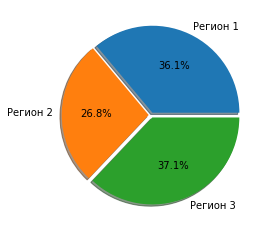

In [10]:
labels = ['Регион 1', 'Регион 2','Регион 3']
fig, ax = plt.subplots()
ax.pie(value_prod, labels=labels, explode=(0.03, 0.03, 0.03),shadow=True,autopct='%.1f%%');

**Выводы по загруженным данным**

1. Размерности датафреймов совпадают
2. В загруженных данных отсутвуют пропуски
3. Отсутствуют дубликаты
4. Наблюдается существенная разница (~30%) в запасах нефти для Региона №2 и Регионов №1,№3. 

## Обучение и проверка модели

In [11]:
# разобьем ДФ на features и target
def f_t(df):
    features = df.drop(['product', 'id'], axis=1)
    target = df['product']
    return features, target

In [12]:
features1, target1 = f_t(df1)
features2, target2 = f_t(df2)
features3, target3 = f_t(df3)

In [13]:
def learning_model(features, target, region):
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))     
    print('\n',region)
    print('Средний запас предсказанного сырья,тыс. баррелей: ', np.mean(predictions))
    print('Медианный запас предсказанного сырья, тыс. баррелей: ', np.median(predictions))
    print('RMSE модели: ', rmse)
    return features_train, features_valid, target_train, target_valid, predictions;

In [14]:
features_train1, features_valid1, target_train1, target_valid1, predictions1 = learning_model(features1, target1, 'Регион № 1')
features_train2, features_valid2, target_train2, target_valid2, predictions2 = learning_model(features2, target2, 'Регион № 2')
features_train3, features_valid3, target_train3, target_valid3, predictions3 = learning_model(features3, target3, 'Регион № 3')


 Регион № 1
Средний запас предсказанного сырья,тыс. баррелей:  92.59256778438035
Медианный запас предсказанного сырья, тыс. баррелей:  92.66188351790805
RMSE модели:  37.5794217150813

 Регион № 2
Средний запас предсказанного сырья,тыс. баррелей:  68.728546895446
Медианный запас предсказанного сырья, тыс. баррелей:  57.851585882427
RMSE модели:  0.893099286775617

 Регион № 3
Средний запас предсказанного сырья,тыс. баррелей:  94.96504596800489
Медианный запас предсказанного сырья, тыс. баррелей:  95.03120442123549
RMSE модели:  40.02970873393434


**Предварительный анализ полученных данных:**
1. Для Региона №2 наблюдаем разброс между медианным и средним значением запасов сырья, это свидетельствует о значительно неравномерном распределении нефти от скважины к скважине, причем разброс похоже по принципу "здесь густо, там пусто".
2. Регион №2 обладает наименьшими запасами нефти среди 3 Регионов.
3. Модель очень точно сделала предсказание запасов нефти для Региона №2. Модель одна для всех регионов, а разброс rmse отличается почти на 2 порядка для Региона №2! Это конечно хорошо, что такая точность, но почему по 1и 3 региону такая разница?! Посмотри на признаки под "углом корреляии":

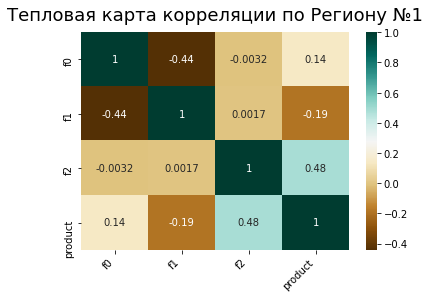

In [15]:
heatmap = sns.heatmap(df1.corr(), cbar=True, annot=True,cmap='BrBG');
heatmap.set_title('Тепловая карта корреляции по Региону №1', fontdict={'fontsize':18}, pad=12);
plt.xticks(rotation=45, ha='right');

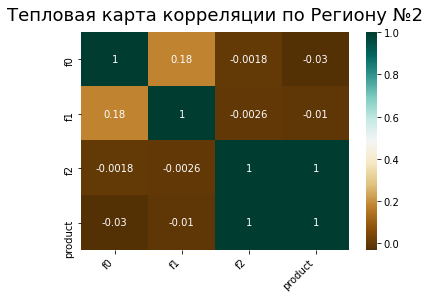

In [16]:
heatmap = sns.heatmap(df2.corr(), cbar=True, annot=True,cmap='BrBG');
heatmap.set_title('Тепловая карта корреляции по Региону №2', fontdict={'fontsize':18}, pad=12);
plt.xticks(rotation=45, ha='right');

А вот и причина!!!
(df3 можно и не смотреть... )  
Видим для Региона №2  просто "поразительую" корреляцию между целевыми признаками product-f2, корреляция равна **Единице!** 
Могу предположить, что 2-м регионе залежи нефти имеют отличные параметры от залежей в регионе 1 и 3, это может быть глубина залегания, св-во пластов земли (пористость), давление,температура и т.п., и именно для подобной "конфигурации" залегания нефти, параметр f2 дает столь точные  данные. Исключить данный параметр (f2) мы не можем (по принципу это слишком "очевидный" параметр), т.к. эти все 3 признака - значимы.

**Резюмируя** можно сказать, что "мал клоп да..." , Регион №2  имеет средние запасы прмиерно на 30% меньше по сравнению с запасами в Регионе 1 или  Регионе 3, но эти прогнозируемые запасы, прогнозируются достаточно точно, чего не сказать о Регионе 1 и 3.  
В общем, регион 2 меня заинтересовал тем, что с вероятноть практически 100%, можно определить объемы залежи нефти в скважине. Посмотрим дальше, что покажет расчет прибыли, рисков... 

## Подготовка к расчёту прибыли

In [17]:
#Оцифруем условия задачи в константы

total = 10_000_000 # бюджет на регион, тыс.руб.
price = 450 # прибыль, тыс. руб от одной тысячи барелей
research_well = 500 # скважины для исследования
best_well = 200 # лучшие скважины для разработки (из 500)
confidence_interval = 0.95 # доверительный интервал
loss = 0.025 # максимальная вероятность убытков- 2.5%

break_even = total / best_well # минимальная прибыль с лучшей скважины, тыс.руб.

value_even = round(break_even/price) # минимальный объем безубыточности скважины в тыс. баррелях 

print(f'Любая из {best_well} cкважин должна приносить не менее {round(break_even)} тыс.руб. прибыли')
print( f'Объём сырья достаточный для безубыточной разработки новой скважины {value_even} тыс.баррелей') 
print('Средние запасы в регионах, тыс. баррелей на скважину:')
print('Регион №1 -',round(np.mean(predictions1)),'Регион №2 -',round(np.mean(predictions2)),'Регион №3 -',round(np.mean(predictions3)))

Любая из 200 cкважин должна приносить не менее 50000 тыс.руб. прибыли
Объём сырья достаточный для безубыточной разработки новой скважины 111 тыс.баррелей
Средние запасы в регионах, тыс. баррелей на скважину:
Регион №1 - 93 Регион №2 - 69 Регион №3 - 95


Расчеты неутешительные, ни одна "средняя" скважина ни в одном из 3-х регионов не дотягивает, до минимального "объема безубыточности", но нам ведь средняя и не нужна! Нам нужны всего 200, хороших скважин. Посмотрим на объемы нефти в скважинах немного по другому: 

In [18]:
def countwells (pred,region):
    count = 0
    count = sum(map(lambda x: x >value_even, pred))
    print(f'Число скважин в {region} удовлетворяющих объему безубыточности - {count} шт. или в {100*count/len(pred)}%')

In [19]:
countwells(predictions1, 'Регион №1')

Число скважин в Регион №1 удовлетворяющих объему безубыточности - 5442 шт. или в 21.768%


In [20]:
countwells(predictions2, 'Регион №2')

Число скважин в Регион №2 удовлетворяющих объему безубыточности - 4690 шт. или в 18.76%


In [21]:
countwells(predictions3, 'Регион №3')

Число скважин в Регион №3 удовлетворяющих объему безубыточности - 5266 шт. или в 21.064%


Видим любопытную картину: Регион 1 и 3 имеют запасов нефти примерно на 30% больше чем Регион 2, между тем число скважин имеющих минимальные запасы для безубыточной добычи у всех трех Регионов примерно одинаковое 19-21%, это говорит о том, что Регион 1 и Регион 3 изобилуют скважинами с небольшими запасами сырья, за счет которых эти Регионы в целом и показывают общие хорошие запасы нефти.

Немного визуализации...

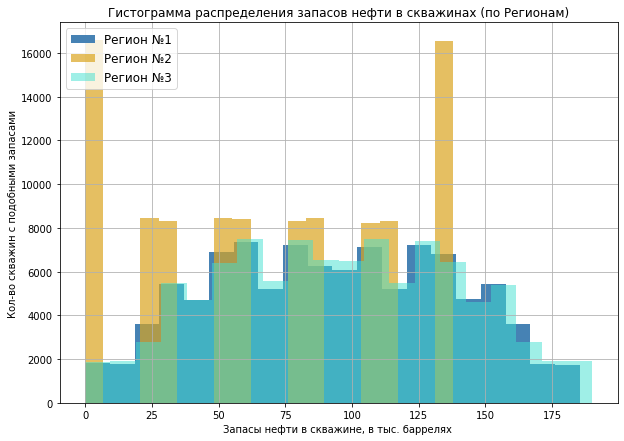

In [22]:
ax = df_prod.plot(y = 'prod1', kind = 'hist', bins = 20, grid=True, figsize = (10,7), color = '#4682B4')
df_prod.plot(y = 'prod2', kind = 'hist', bins = 20, grid=True, figsize = (10,7),ax=ax, alpha = 0.7, color = '#DAA520')
df_prod.plot(y = 'prod3', kind = 'hist', bins = 20, grid=True, figsize = (10,7),ax=ax, alpha = 0.5,color = '#40E0D0')
plt.title('Гистограмма распределения запасов нефти в скважинах (по Регионам)')
plt.xlabel('Запасы нефти в скважине, в тыс. баррелях ')
plt.ylabel('Кол-во скважин с подобными запасами')
plt.legend(['Регион №1','Регион №2','Регион №3'], fontsize=12, loc='upper left');
plt.show()

**Резюмируя**  

Регион №2 выгодно отличается от двух других по запасам нефти на скважину, в Регионе №2 нефти в скважине либо нет, либо есть.. :)(полагаю, именно из за этого выброса в районе 0-5 тыс. баррелей для Региона №2 мы и видим разницу между медианным и средним значением).  
А если серьезно, то по 2-му Регионы, мы действительно наблюдаем для существенного кол-ва скважин запас нефти более 125 тыс. баррелей на скважину, это на 10% больше минимального безубыточного объема добычи в 111 тыс. барелей.  
С другой стороны, в Регионе №2 совсем нет скважин с запасом свыше 138 тыс. баррелей, тогда как в Других Регинов они присутствуют.

## Расчёт прибыли и рисков 

In [23]:
# Расчитаем прибыль на основе предсказанных значениях
def best_profit(predict,target, region):
    df = target.to_frame()
    df['predict'] = predict
    best_wells_target = df.sort_values(by=['product'], ascending = False).head(200)
    best_wells_predict = df.sort_values(by=['predict'], ascending = False).head(200)
    value_product_target = round(best_wells_target['product'].sum()) # объём сырья в 200-та лучших скважин (реальных)
    value_product_predict = round(best_wells_predict['predict'].sum()) # объём сырья в 200-та лучших скважин (предсказанных)
    result_profit_target = round(best_wells_target['product'].sum() * price - total) # прибыль с этих скважин
    result_profit_predict = round(best_wells_predict['predict'].sum() * price - total) # прибыль с этих скважин
    
    print(f'\n{region}.\nОбъём сырья в {best_well} скважинах:\n -на основе предсказания модели = {value_product_predict} тыс.баррелей\n -на основе реальных данных = {value_product_target} тыс.баррелей.')
    
    print(f'\nПрибыль c {best_well} скважин:\n -на основе предсказания модели = {result_profit_predict}тыс.руб.\n -на основе реальных данных = {result_profit_target}тыс.руб.')
    return df


In [24]:
best200_reg1 = best_profit(predictions1,target_valid1, 'Регион №1')


Регион №1.
Объём сырья в 200 скважинах:
 -на основе предсказания модели = 31102 тыс.баррелей
 -на основе реальных данных = 36691 тыс.баррелей.

Прибыль c 200 скважин:
 -на основе предсказания модели = 3996049тыс.руб.
 -на основе реальных данных = 6510948тыс.руб.


In [25]:
best200_reg2 = best_profit(predictions2,target_valid2, 'Регион №2')


Регион №2.
Объём сырья в 200 скважинах:
 -на основе предсказания модели = 27746 тыс.баррелей
 -на основе реальных данных = 27589 тыс.баррелей.

Прибыль c 200 скважин:
 -на основе предсказания модели = 2485712тыс.руб.
 -на основе реальных данных = 2415087тыс.руб.


In [26]:
best200_reg3 = best_profit(predictions3,target_valid3, 'Регион №3')


Регион №3.
Объём сырья в 200 скважинах:
 -на основе предсказания модели = 29604 тыс.баррелей
 -на основе реальных данных = 37650 тыс.баррелей.

Прибыль c 200 скважин:
 -на основе предсказания модели = 3321754тыс.руб.
 -на основе реальных данных = 6942663тыс.руб.


Здесь все ожидаемо, по Региону №2 самые точные прогнозы (помним о "волшебном" признаке f2 по Региону №2).  

Интереснее будет, что покажет Бутстреп для полученной нами модели. Данной процедурой оценим доверительные интервалы для каждого региона, с лучшими скважинами.  

Вкратце, что сделаем: из каждого Региона со сформированным целевым признаком полученным/прогнозируеммым на основе алгоритма Линейной  регресиии, "нарежем" 1000 выборок по 500 элементов(они же скважины). Из эти 500 скважин, выберем лучшие 200 скважин.  
Далее посчитаем среднюю прибыль с этих лучших скважин, если она превышает точку безубыточности, то плюсик в карму, если нет, то считаем риски уйти в минуса. Риск конечно дело благородное, но наш предел это 2.5%.
Так же найдем доверительный интервал в размере 95% для средней прибыли, т.е. найдем значения которые примет прибыль с вероятностью 95%. 

In [27]:
def region(best200, region):
    state = np.random.RandomState(12345)
    values = []
    error = 0
    for i in range(1000):
        subsample = best200.sample(n = research_well, replace = True, random_state = state)
        subsample = subsample.sort_values(by=['predict'], ascending = False).head(best_well)
        mean = round(subsample['product'].sum() * price - total)

#        if(mean < 0):
#            error += 1
        values.append(mean)
        
    values = pd.Series(values)
    lower = round(values.quantile(loss))
    upper = round(values.quantile(confidence_interval + loss))
   
    print(f'Средняя прибыль: {round(values.mean())}')
    print(f'95%-ый доверительный интервал: от {lower} до {upper}')
#    print('Риск убытков {:.1%}'.format(error / 1000),f'(максимально возможный убыток {round(values.min())} тыс.руб.)')
    print('Риск убытков(2) {:.1%}'.format((values < 0).mean()))

In [28]:
region(best200_reg1, 'Регион №1')

Средняя прибыль: 396165
95%-ый доверительный интервал: от -111215 до 909767
Риск убытков(2) 6.9%


In [29]:
region(best200_reg2, 'Регион №2')

Средняя прибыль: 456045
95%-ый доверительный интервал: от 33820 до 852290
Риск убытков(2) 1.5%


In [30]:
region(best200_reg3, 'Регион №3')

Средняя прибыль: 404404
95%-ый доверительный интервал: от -163350 до 950359
Риск убытков(2) 7.6%


# Выводы кас-но прибыли и рисков, выбора Региона добычи нефти

**Несмотря на меньшие запасы нефти в Регионе №2 по сравнению с Регионом 1 и 3, данный регион (Регион №2) является единственным где можно с большой долей вероятности - 98,5%  вести безубыточную разработку и добычу нефти. Помимо самой высокой средней прибыли от добычи нефти среди 3-х регионов (456045тыс.руб.), данный регион несет и минимальные риски возникновения убытка - 1,5% (при допустимом риске 2.5%).**    
Регион для разработки и добычи нефти, это Регион № 2.
